### Song lyrics for Robyn from azlyrics.com
https://www.azlyrics.com/r/robyn.html

In [39]:
import requests
import pandas as pd
import re
import string
from bs4 import BeautifulSoup
import time
import numpy as np
import wordcloud
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
url = "https://www.lyrics.com/artist.php?name=Robyn&aid=214508&o=1"
response = requests.get(url)

# parse html
page = str(BeautifulSoup(response.content))
soup = BeautifulSoup(page, "lxml")

##### find_all with BeautifulSoup

In [3]:
lyrics = []
tables = soup.find_all(class_='tdata')
for t in tables:
    cells = t.find_all('td', class_="tal qx")
    for c in cells:
        links = c.find_all('a')
        for l in links:
            #print(l.text)
            #print(l['href'])
            lyrics.append((l['href']))

In [4]:
#convert into dataframe
df_lyrics = pd.DataFrame(lyrics)
#keep only lyrics links
df_lyrics = df_lyrics[df_lyrics[0].str.contains('lyric')]
#create full url
df_lyrics['url'] ='https://www.lyrics.com'+df_lyrics[0]

In [5]:
df_lyrics['url'].head()

0    https://www.lyrics.com/lyric/6774767/Robyn/Ain...
2    https://www.lyrics.com/lyric/14076015/Robyn/An...
4    https://www.lyrics.com/lyric/11948027/Robyn/An...
6    https://www.lyrics.com/lyric/10529309/Robyn/An...
8    https://www.lyrics.com/lyric/35561128/Robyn/Ba...
Name: url, dtype: object

##### findall with re

In [ ]:
#re.findall('<a href=\"/lyric/+[a-z]+.\">$', str(soup), re.IGNORECASE)
links_m2 = re.findall('href=..lyric.\d+.Robyn.[^\"]+', str(soup), re.IGNORECASE)
#links_m2

In [ ]:
#convert into dataframe
df_lyrics2 = pd.DataFrame(links_m2)

In [ ]:
#create full url
df_lyrics2['url'] ='https://www.lyrics.com'+df_lyrics2[0].astype(str).str[6:]

In [ ]:
df_lyrics2['url'].head()

##### pull lyrics

In [14]:
# for testing with just 3 urls
# df_url = df_lyrics['url'].head(3)

df_url = df_lyrics['url']

In [ ]:
# parse all lyrics  and save as html files
"""for l in df_url:
    time.sleep(20)
    url = df_url
    response = requests.get(l)
    page = BeautifulSoup(response.content)
    filename = l.rsplit('/', 1)[-1]
    filename = re.sub('[^a-zA-Z0-9-_*.]', '', filename)
    page = page.prettify("utf-8")
    with open(f'lyrics_{filename}.html', "wb") as file:
        file.write(page)   """

#### Load and clean pages

In [ ]:
# testing with just one specific html
# soup = BeautifulSoup(open("lyrics_Ain27tNoThing.html"), "html.parser")
# print(soup.prettify())

In [43]:
# function to clean html bodies
def cleaning(soup):
    # filter only for body with lyrics
    lyric = soup.find(class_='lyric-body').get_text()
    #replace abc't 
    lyric = lyric.replace('\'t','t')
    #replace line breaks
    lyric = lyric.replace('\n',' ')
    # remove words shorter than 3 characters
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    lyric = shortword.sub('', lyric)
    # convert into lower caps
    lyric = lyric.lower()
    # exclude numbers
    lyric = ''.join(i for i in lyric if not i.isdigit())
    # special characters
    chars = re.escape(string.punctuation)
    lyric = re.sub(r'['+chars+']', '',lyric)
    return lyric
    

#### Merging lyrics

In [44]:
# loading all lyrics html from local directory and applying the cleaning 
all_lyrics = ""
for l in df_url:
    filename = l.rsplit('/', 1)[-1]
    filename = re.sub('[^a-zA-Z0-9-_*.]', '', filename)
    soup = BeautifulSoup(open(f'lyrics_{filename}.html'), "html.parser")
    text = cleaning(soup)
    all_lyrics += text

In [45]:
# saving combined lyrics locally
f = open('all_lyrics.csv','w')
f.write(all_lyrics) #Give your csv text here.
f.close()

In [46]:
all_lyrics

'boy you gotta want really really want boy you gotta need cause baby cant get enough and trying catch the feeling how used and how used feel back then saying that aint thing for baby aint thing for you but baby thing for you there nothing for and nothing for you said you might wanna write this down  boy you know want you really really want you really need you but dont wanna pick your socks and maybe really silly thing but baby would just nice compromise saying that aint thing for baby aint thing for you but baby thing for you there nothing for and nothing for you saying that aint thing for baby aint thing for you but baby thing for you there nothing for and nothing for you  and maybe really silly thing but baby would just nice compromise  aint thing aint thing saying that aint thing for baby aint thing for you but baby thing for you there nothing for and nothing for you saying that aint thing for baby aint thing for you but baby thing for you there nothing for and nothing for you  like

#### wordcloud

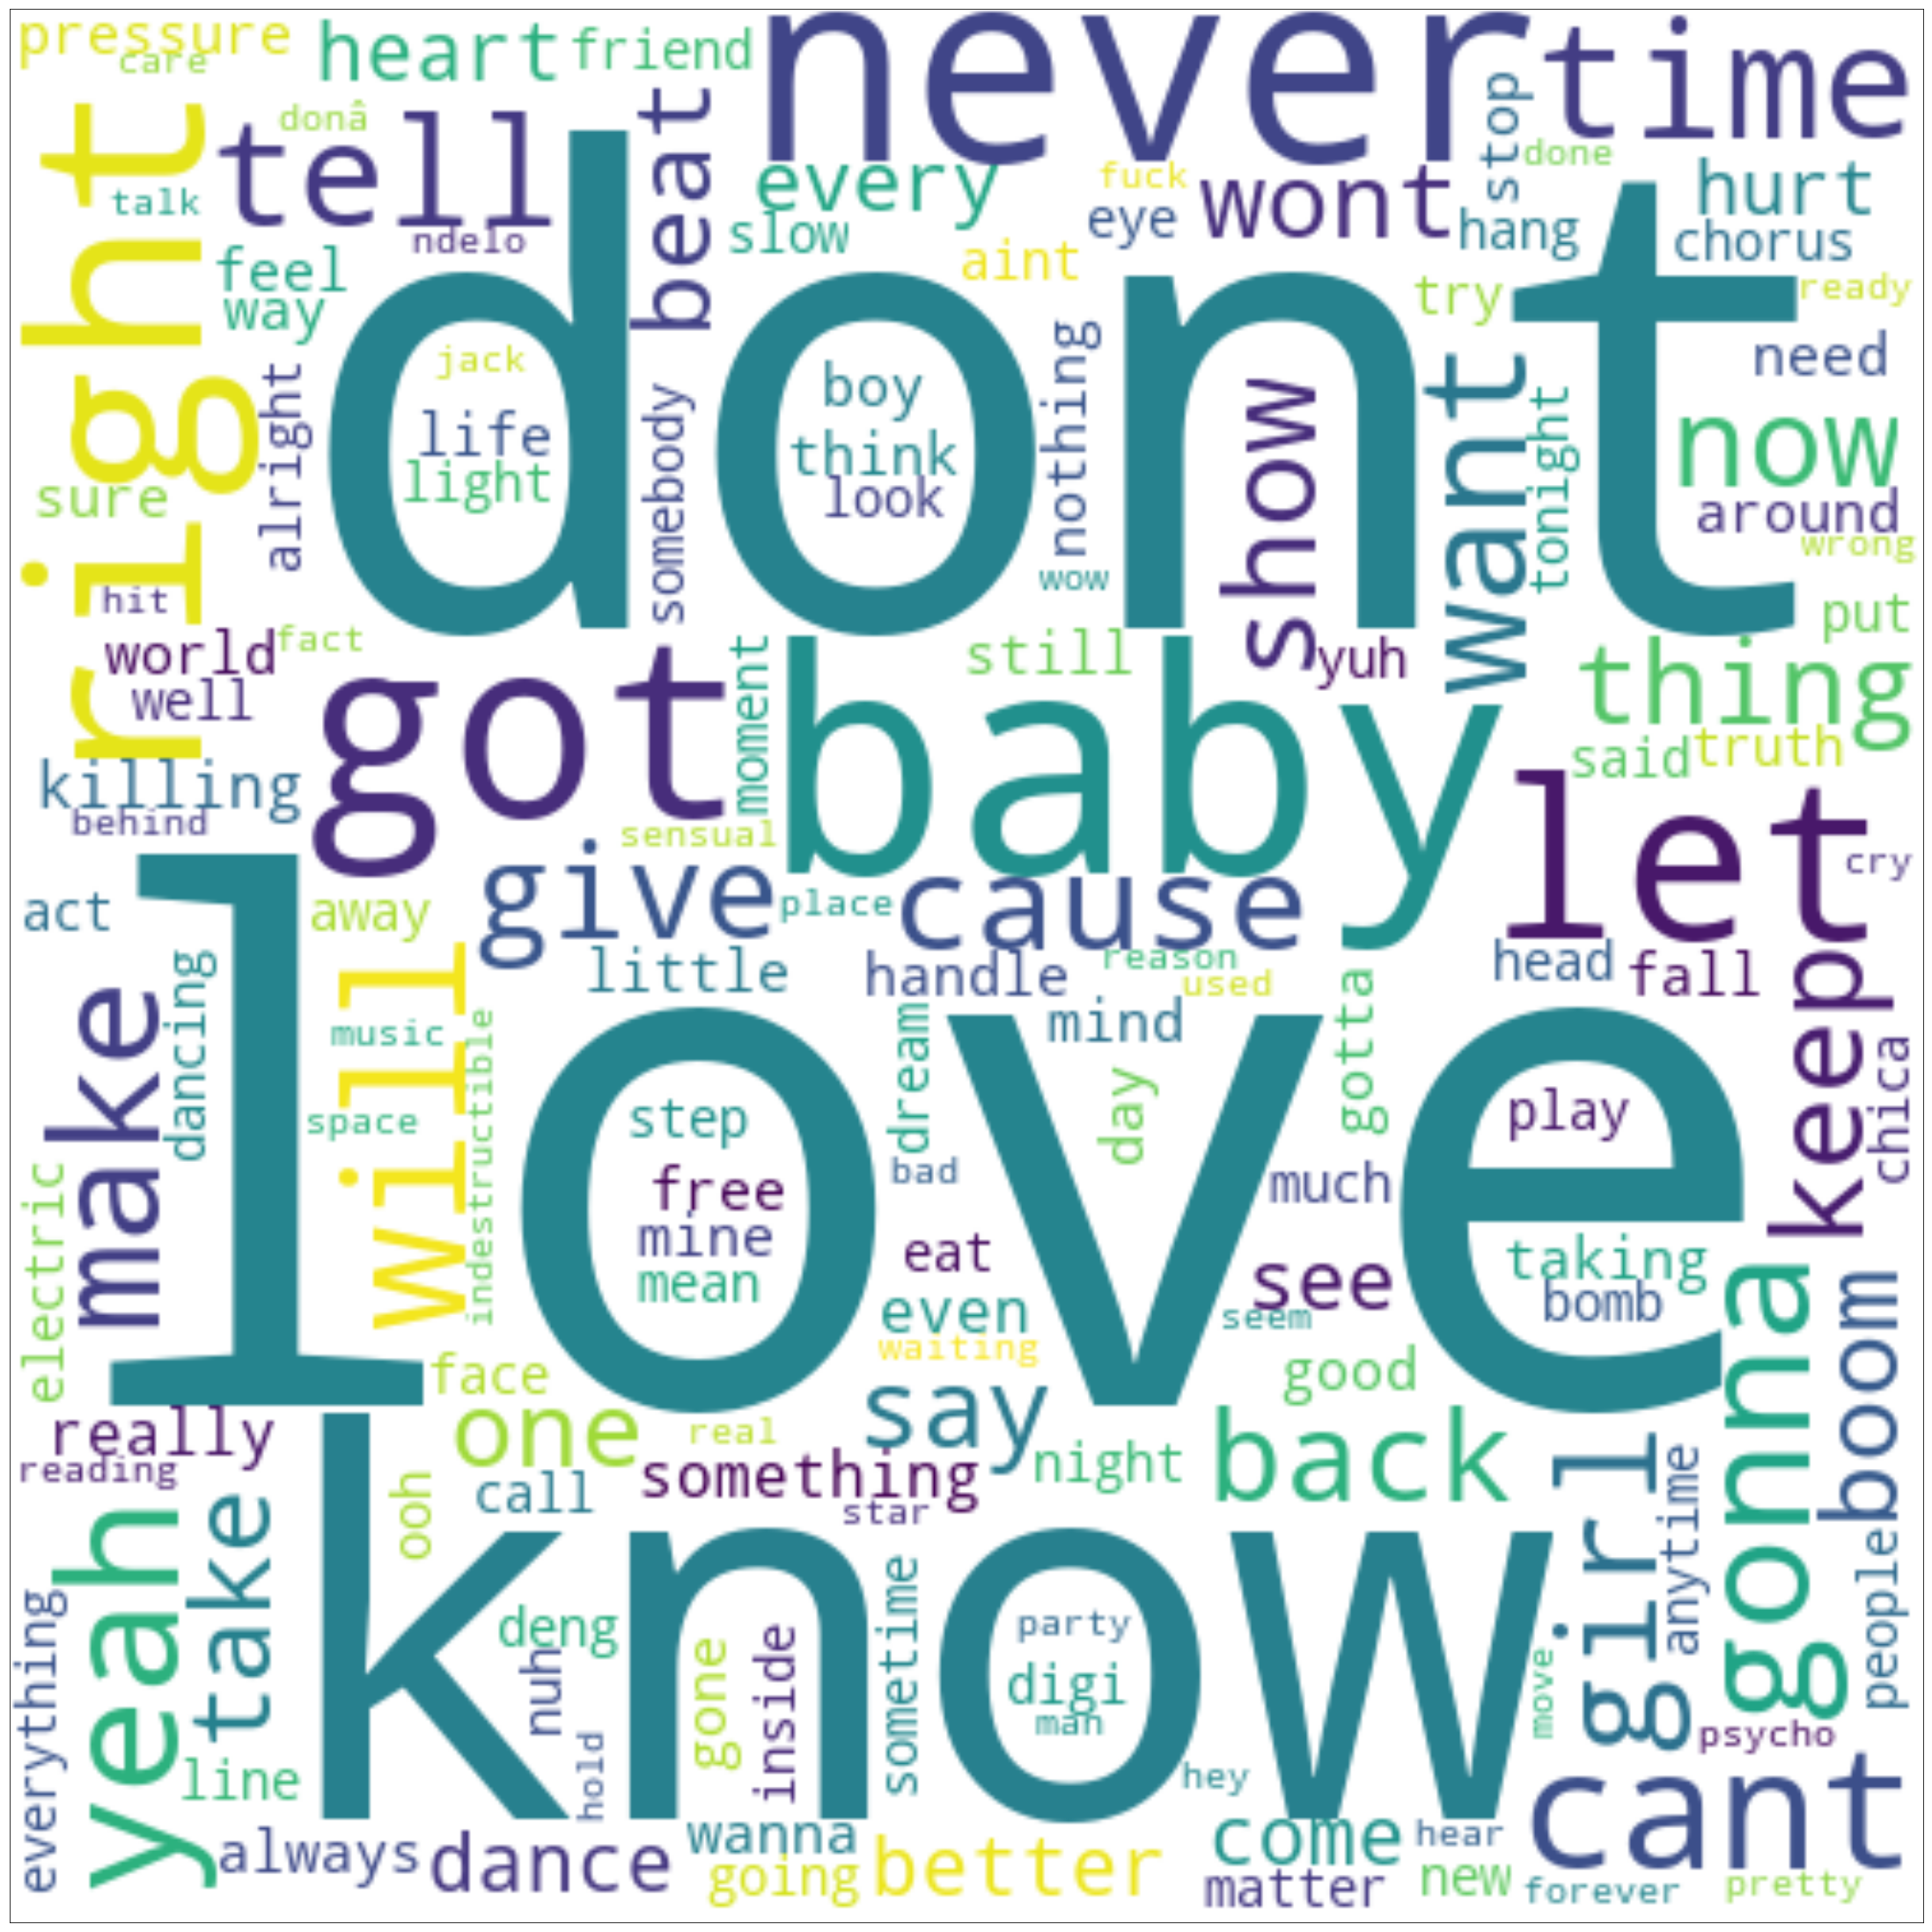

In [47]:
# all the lyrics 
lyrics = all_lyrics

mask = np.zeros((500, 500, 3), np.uint8)

mask.shape

#mask[150:350,50:350,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=150,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(lyrics) # <-- lyrics is a string
                # stop words are removed!

plt.figure(figsize = (40,40))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('Robyn_wordcloud.png')
plt.xticks([])
plt.yticks([])
plt.show()